<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #9 : The Influence of Individual Observations

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Used Cars - Ford Focus Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Car Type: Ford Focus</li>
        <li>Response Variable: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Miles; (data includes only cars with Miles > 5,000)</li>
          <li>Age; Years old</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1U4anANNmtMFMg9iLM_P5Lp_f39qGCZiZ" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Read in the data

In [2]:
#@title Read in Data

# Reading data in using read_csv 
FordFocus <- read_csv("http://www.StatsClass.org/stat360/Datasets/UsedCars_FordFocus.csv")

Rows: 67 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Make:Model
dbl (3): Price, Miles, Age


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



View the first few rows of the data.frame.

In [3]:
#@title View the first few rows of data
head(FordFocus)
dim(FordFocus)

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,15998,7909,-2
Ford Focus,9999,11946,-5
Ford Focus,12998,12499,-3
Ford Focus,12998,12499,-3
Ford Focus,12445,13912,-1
Ford Focus,9999,14000,-5


[1] 67  4

The following snip-it of code can be used to remove all na values from a data.frame.

In [4]:
#@title Removing the NA from the data.frame
FordFocus <- (
              FordFocus
                %>% drop_na()
             )

head(FordFocus)
dim(FordFocus)

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,15998,7909,-2
Ford Focus,9999,11946,-5
Ford Focus,12998,12499,-3
Ford Focus,12998,12499,-3
Ford Focus,12445,13912,-1
Ford Focus,9999,14000,-5


[1] 65  4

## Setup for Model #1, i.e. Price ~ Miles

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Miles</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles) = \beta_{0} + \beta_{1} * Miles$</li>
  <li>$Var(Price | Miles) = \sigma^{2}$</li>
</ul></ul>

## Setup for Model #2, i.e. Price ~ Age

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Age</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Age) = \gamma_{0} + \gamma_{1} * Age$</li>
  <li>$Var(Price | Age) = \delta^{2}$</li>
</ul></ul>

## Model #1 Output

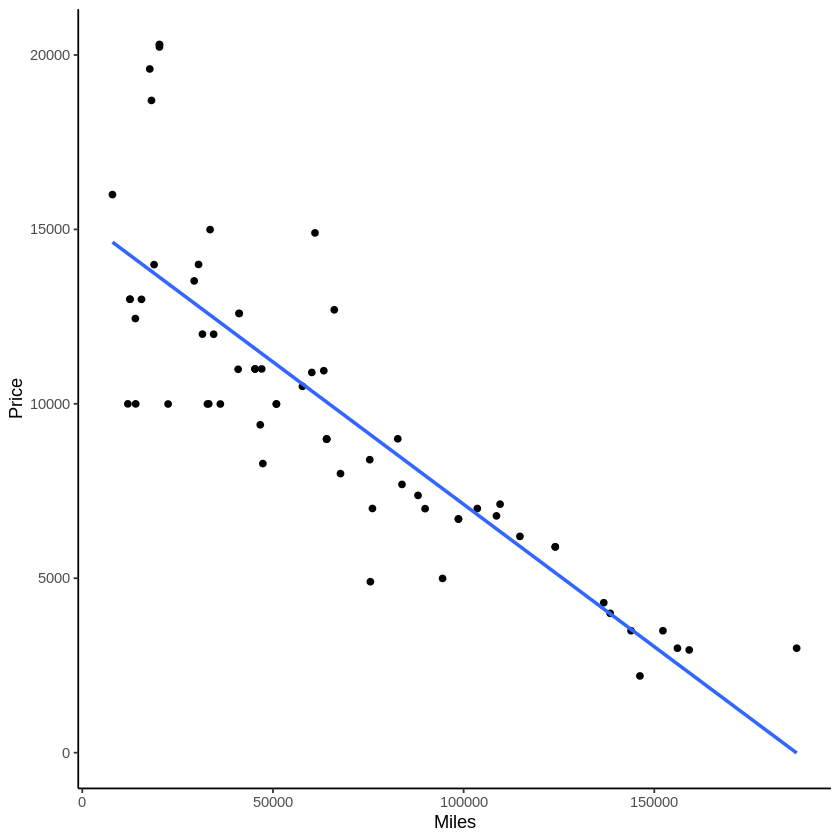

In [5]:
#@title Scatterplot with simple linear regression line
ggplot(data=FordFocus, aes(x=Miles,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

In [6]:
#@title Fitting Model #1
FordFocus_Model1 <- lm(Price ~ Miles, data=FordFocus)

In [7]:
#@title Getting a summary of the model
summary(FordFocus_Model1)


Call:
lm(formula = Price ~ Miles, data = FordFocus)

Residuals:
    Min      1Q  Median      3Q     Max 
-4306.7 -1131.3  -473.9   666.8  6669.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.528e+04  5.398e+02   28.31   <2e-16 ***
Miles       -8.162e-02  6.788e-03  -12.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2440 on 63 degrees of freedom
Multiple R-squared:  0.6965,	Adjusted R-squared:  0.6917 
F-statistic: 144.6 on 1 and 63 DF,  p-value: < 2.2e-16


## Model #2 Output

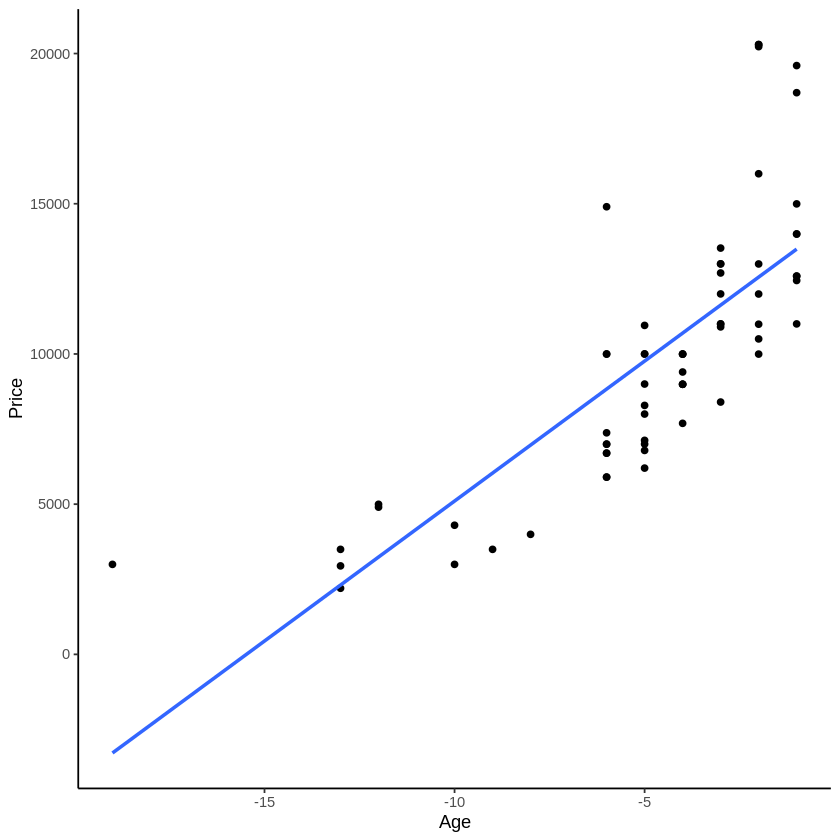

In [8]:
#@title Scatterplot with simple linear regression line
ggplot(data=FordFocus, aes(x=Age,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

In [9]:
#@title Fitting Model #2
FordFocus_Model2 <- lm(Price ~ Age, data=FordFocus)

In [10]:
#@title Getting a summary of the model
summary(FordFocus_Model2)


Call:
lm(formula = Price ~ Age, data = FordFocus)

Residuals:
    Min      1Q  Median      3Q     Max 
-3562.4 -1835.6  -699.2  1169.4  7741.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14421.6      591.1  24.396  < 2e-16 ***
Age            931.8       98.0   9.508 8.62e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2838 on 63 degrees of freedom
Multiple R-squared:  0.5893,	Adjusted R-squared:  0.5828 
F-statistic: 90.41 on 1 and 63 DF,  p-value: 8.623e-14


### Removing Age = -19 from consideration

In [23]:
FordFocus[c(65), ]

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,2995,187334,-19


To remove this row from consideration, simply use the following syntax.

In [21]:
#@title Fitting Model #2b
FordFocus_Model2_without_row65 <- lm(Price ~ Age, data=FordFocus[-c(65), ])

In [22]:
summary(FordFocus_Model2_without_row65)


Call:
lm(formula = Price ~ Age, data = FordFocus[-c(65), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3411.0 -1726.3  -759.9  1239.1  7466.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14980.8      601.2  24.918  < 2e-16 ***
Age           1074.0      107.4   9.996 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2707 on 62 degrees of freedom
Multiple R-squared:  0.6171,	Adjusted R-squared:  0.6109 
F-statistic: 99.92 on 1 and 62 DF,  p-value: 1.516e-14


In [75]:
sigma(FordFocus_Model2_without_row65)

[1] 2707.428

## The Concept of Leverage

The Hat matrix is defined as follows

$$
\bf{H} = \bf{X}(\bf{X}^{'}\bf{X})^{-1} \bf{X}^{'}
$$

The following steps can be followed to obtain the $h_{i}$ values for each observation.

In [122]:
#@title Setting up the X matrix
x0 <- rep(1,65)
x1 <- FordFocus$Age

#Create the matrix
X <- cbind(x0,x1)

In [123]:
#@title Getting Hat matrix
#First, create XpX
XpX <- t(X) %*% X

#Next, getting its inverse
XpXInv <- solve(XpX,diag(2))

#Next, computing the H matrix
H <- X %*% XpXInv %*% t(X)

#Getting the diagonal elements of the Hat matrix
diag(H)


[1] 0.02504587 0.01541284 0.01944954 0.01944954 0.03302752 0.01541284
 [7] 0.02504587 0.03302752 0.03302752 0.03302752 0.02504587 0.02504587
[13] 0.02504587 0.02504587 0.01944954 0.03302752 0.01944954 0.01697248
[19] 0.01697248 0.03302752 0.02504587 0.01623853 0.02504587 0.03302752
[25] 0.03302752 0.01944954 0.01944954 0.01623853 0.03302752 0.01541284
[31] 0.01623853 0.01623853 0.02504587 0.01944954 0.01697248 0.01541284
[37] 0.01623853 0.01623853 0.01623853 0.01944954 0.01541284 0.01944954
[43] 0.07642202 0.01541284 0.01541284 0.01623853 0.01697248 0.01697248
[49] 0.07642202 0.01697248 0.01697248 0.01697248 0.01541284 0.01541284
[55] 0.01541284 0.01697248 0.01697248 0.04706422 0.02724771 0.09467890
[61] 0.09467890 0.03596330 0.04706422 0.09467890 0.25431193

The hat values for each observations can be obtained using the hatvalues() function in R.  The hatvalues() function will return $h_{i}$ for each observations.

In [121]:
#@title Getting the hat values for Price ~ Age, i.e. Model2
hatvalues(FordFocus_Model2)

1          2          3          4          5          6          7 
0.02504587 0.01541284 0.01944954 0.01944954 0.03302752 0.01541284 0.02504587 
         8          9         10         11         12         13         14 
0.03302752 0.03302752 0.03302752 0.02504587 0.02504587 0.02504587 0.02504587 
        15         16         17         18         19         20         21 
0.01944954 0.03302752 0.01944954 0.01697248 0.01697248 0.03302752 0.02504587 
        22         23         24         25         26         27         28 
0.01623853 0.02504587 0.03302752 0.03302752 0.01944954 0.01944954 0.01623853 
        29         30         31         32         33         34         35 
0.03302752 0.01541284 0.01623853 0.01623853 0.02504587 0.01944954 0.01697248 
        36         37         38         39         40         41         42 
0.01541284 0.01623853 0.01623853 0.01623853 0.01944954 0.01541284 0.01944954 
        43         44         45         46         47         48         49 
0.07642202 0.01541284 0.01541284 0.01623853 0.01697248 0.01697248 0.07642202 
        50         51         52         53         54         55         56 
0.01697248 0.01697248 0.01697248 0.01541284 0.01541284 0.01541284 0.01697248 
        57         58         59         60         61         62         63 
0.01697248 0.04706422 0.02724771 0.09467890 0.09467890 0.03596330 0.04706422 
        64         65 
0.09467890 0.25431193

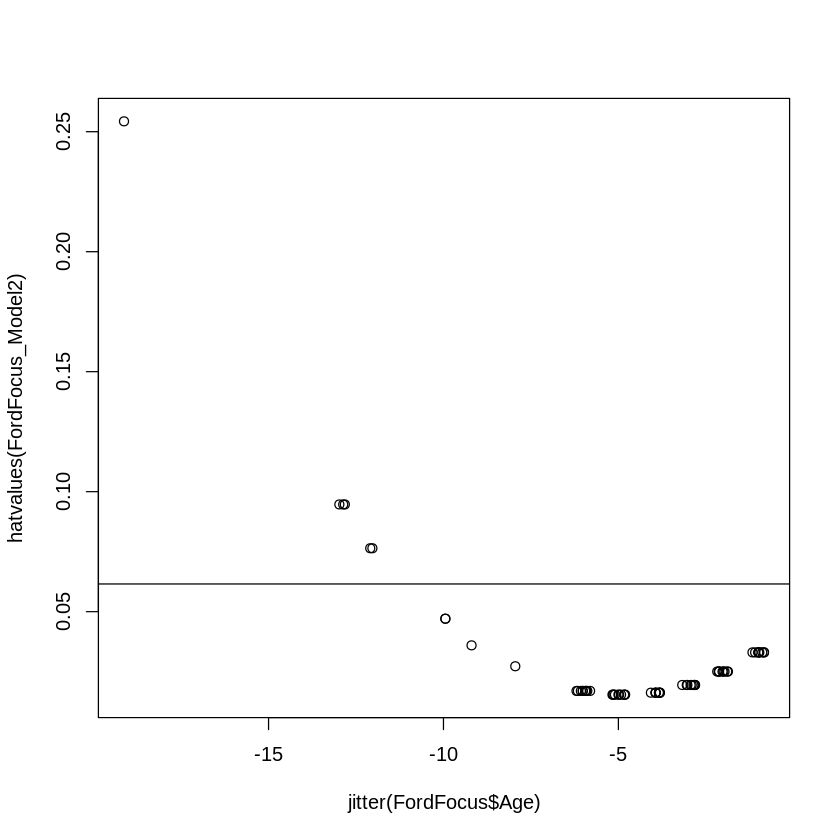

In [132]:
#@title Creating a plot of the hat values
plot(jitter(FordFocus$Age), hatvalues(FordFocus_Model2) )  # add some jitter to Age
#adding a reference line at 2 * (#parameters / n)
abline(h=4/65)

Create a new vector that contains all the observations that have high leverage.

In [45]:
highleverage <- which(hatvalues(FordFocus_Model2) > 4/65)

Next, get the rows from the orginal data.frame that correspond to the observations with high leverage.

In [30]:
FordFocus[highleverage,]

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,4900,75552,-12
Ford Focus,4995,94476,-12
Ford Focus,3495,143904,-13
Ford Focus,2200,146235,-13
Ford Focus,2945,159165,-13
Ford Focus,2995,187334,-19


The orginal scatterplot with the high leverage points identified on the scatterplot.

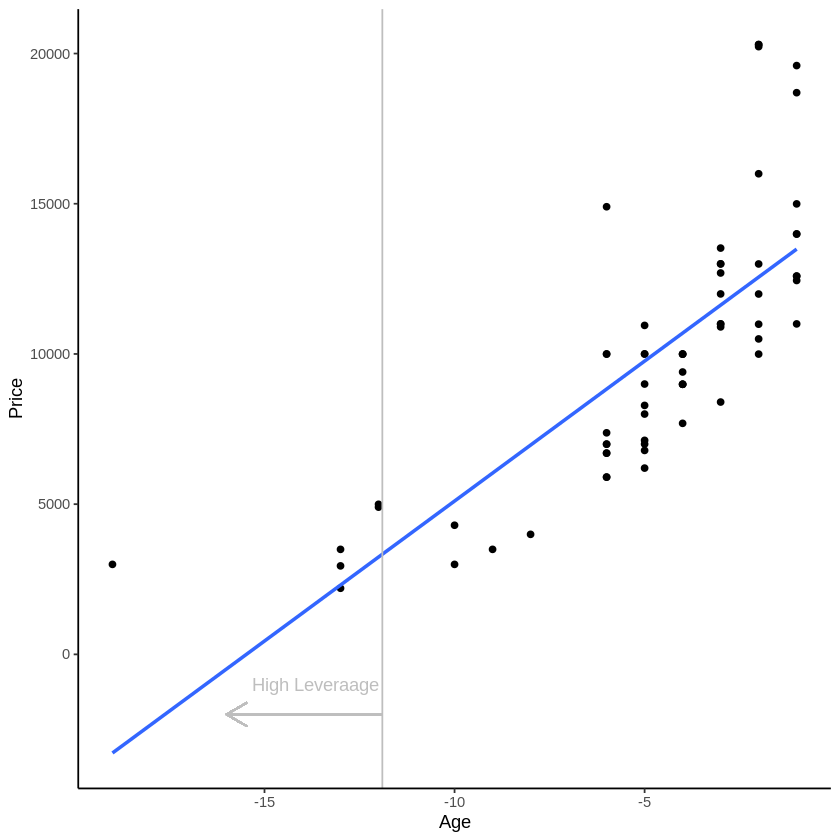

In [44]:
#@title Scatterplot showing the location of the observations with high leverage
ggplot(data=FordFocus, aes(x=Age,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  geom_vline(xintercept=-11.9, color='gray') +
  geom_segment(aes(x = -11.9, y = -2000, xend = -16, yend = -2000),
                  arrow = arrow(length = unit(0.5, "cm")),color='gray') + 
  annotate(geom="text", x=-12, y=-1000, hjust=1, label="High Leveraage",
              color='gray') + 
  theme_classic()

## DFBETA Algorithm

Step 1: Create an empty data.frame to hold the outcomes from the algorithm

In [90]:
DFBETA_Outcomes <-data.frame(rowid=numeric(), yintercept = numeric(), slope = numeric(), rmse = numeric())

Step 2: Fit a model -- removing one observation at a time, put outcomes into  data.frame

In [91]:
for(i in 1:65){
  model_i <- lm(Price ~ Age, data=FordFocus[-c(i), ])
  DFBETA_Outcomes[i,1] <- i
  DFBETA_Outcomes[i,2] <- model_i$coefficients[1]
  DFBETA_Outcomes[i,3] <- model_i$coefficients[2]
  DFBETA_Outcomes[i,4] <- sigma(model_i)
}

Step 3: Compute the change in y-intercept and slope for each observation removed

In [93]:
DFBETA_Outcomes <- (DFBETA_Outcomes
                      %>% mutate(
                                  DFBeta_yint = (14421.6 - yintercept),
                                  DFBeta_slope = (931.8 - slope)
                                )
                   )

Step 4: Sort by the most change in the slope (or yintercept)

In [95]:
 (DFBETA_Outcomes
   %>% arrange(desc(abs(DFBeta_slope)))
   %>% head()
 )

,rowid,yintercept,slope,rmse,DFBeta_yint,DFBeta_slope
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65,14980.85,1073.9707,2707.428,-559.2487,-142.17067
2,8,14183.96,902.8605,2749.587,237.6436,28.93947
3,12,14168.84,904.8896,2681.682,252.7647,26.91036
4,13,14168.84,904.8896,2681.682,252.7647,26.91036
5,11,14171.12,905.1334,2685.008,250.4790,26.66664
6,9,14219.04,907.1395,2780.375,202.5564,24.66053


Creating an index plot for the Change in Slope

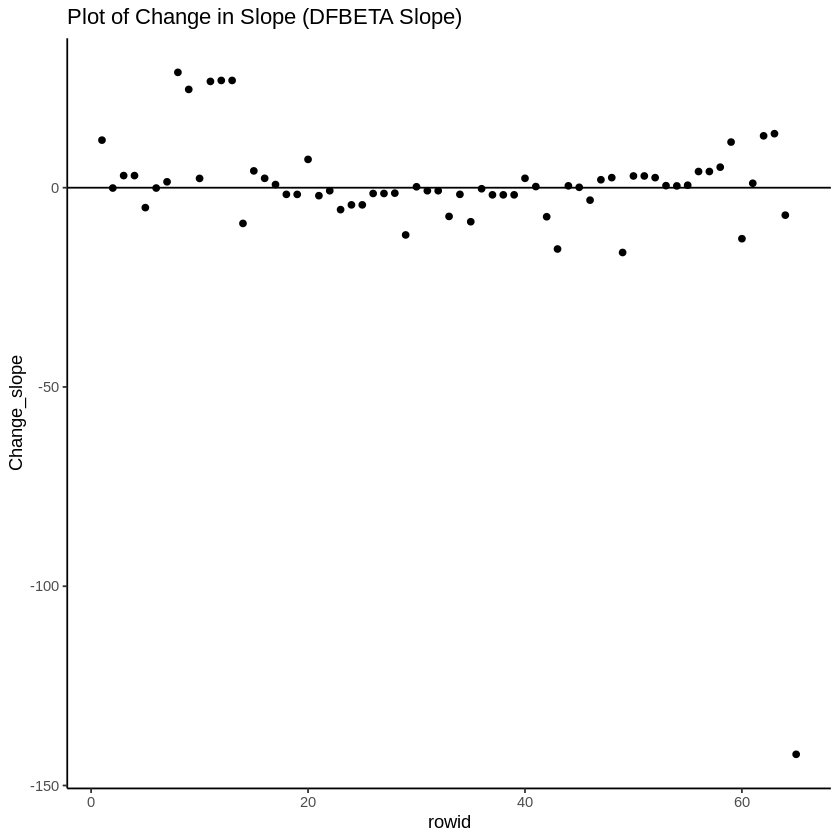

In [85]:
ggplot(data=DFBETA_Outcomes, aes(x=rowid,y=Change_slope)) + 
  geom_point() + 
  ggtitle("Plot of Change in Slope (DFBETA Slope)") + 
  geom_hline(yintercept=0) +
  theme_classic()

### Using the CAR package to more easily create DFBeta Plot

In [97]:
#@title Load car package
#load car package
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




From the car() package, use the dfbetaPlots() function to create the same plot created above.

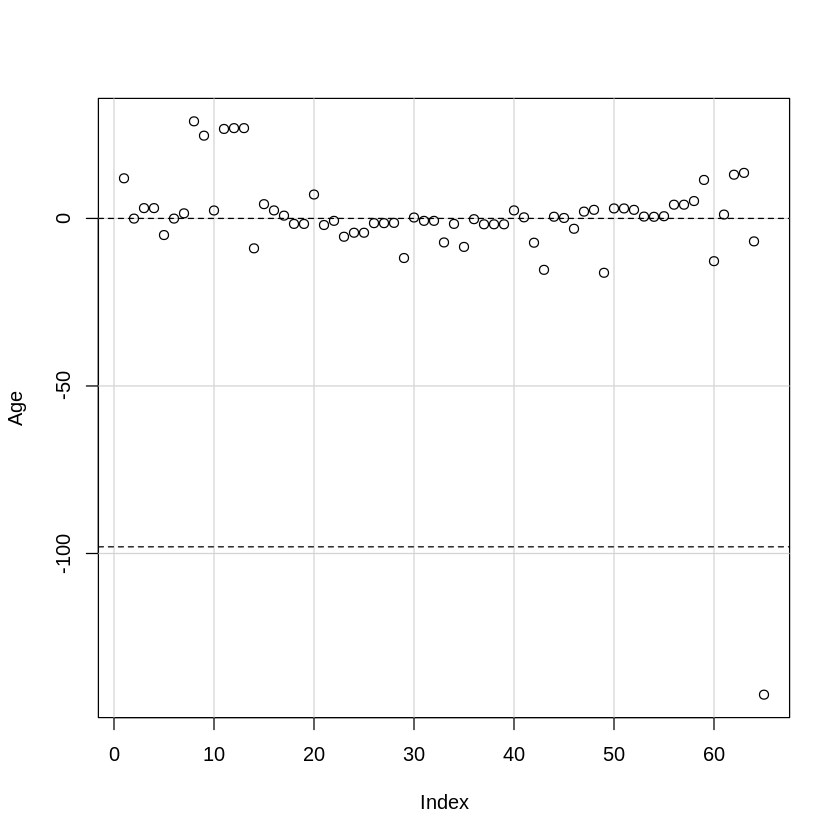

In [104]:
dfbetaPlots(FordFocus_Model2)

The car() package also has the influenceIndexPlot() function that can be used to investigate the influence of each observation on the regression model.  Here, the variable being plotted is the <i>hat</i> values.

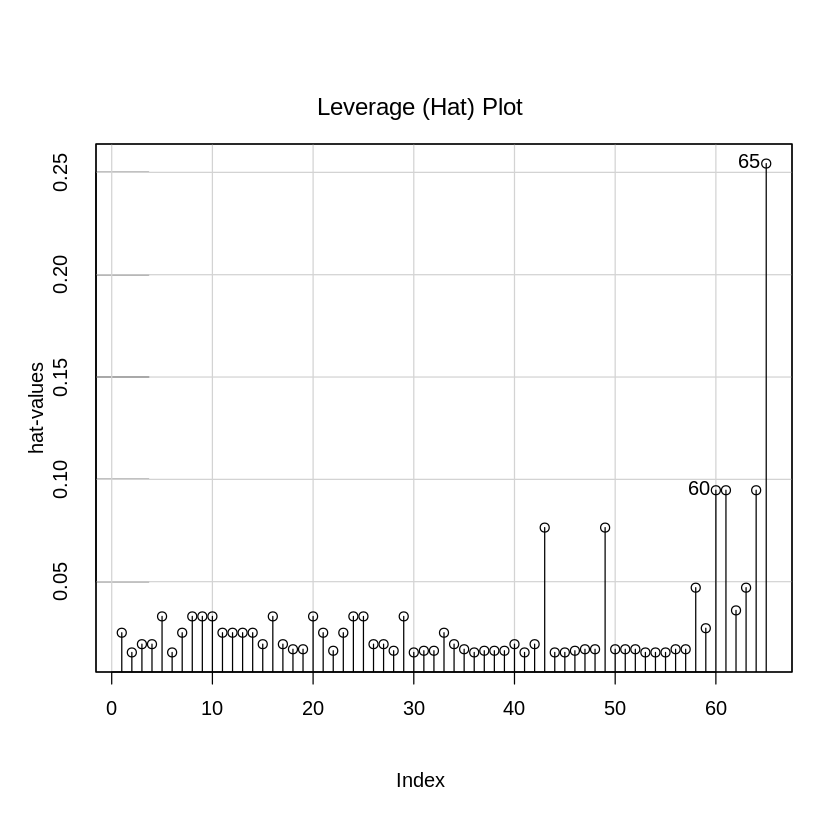

In [127]:
influenceIndexPlot(FordFocus_Model2, vars=c("hat"), grid=TRUE, main="Leverage (Hat) Plot")

## Getting the Standardized Residuals

The standardized residuals are computed as follows.
$$
\mbox{Standardized Residual} = \frac{\hat{e}_{i} - 0}{\sqrt{\hat{\sigma}^{2}(1-h_{ii})}}
$$

In [134]:
#@title Getting the standardized residuals
rstandard(FordFocus_Model1)

1       2       3       4       5       6       7       8       9      10 
 0.5706 -1.7998 -0.5275 -0.5275 -0.7099 -1.7282 -0.4253  2.4026  2.0411  0.1025 
     11      12      13      14      15      16      17      18      19      20 
 2.7489  2.7781  2.7781 -1.4355  0.2650  0.4991 -0.2951 -1.0820 -1.0679  1.0162 
     21      22      23      24      25      26      27      28      29      30 
-0.1965 -0.9663 -0.3954  0.2761  0.2761 -0.2417 -0.2417 -0.8572 -0.1822 -1.2944 
     31      32      33      34      35      36      37      38      39      40 
-0.4677 -0.4677 -0.0282  0.2197  1.9004  0.3463 -0.4383 -0.4383 -0.4383  1.1598 
     41      42      43      44      45      46      47      48      49      50 
-0.7251 -0.3012 -1.7416 -0.8556  0.1942 -0.3096 -0.2982 -0.3926 -1.0670 -0.2205 
     51      52      53      54      55      56      57      58      59      60 
-0.2205  0.0719  0.1547  0.3272  0.1194  0.3111  0.3111  0.0752  0.0053 -0.0171 
     61      62      63      64      65 
-0.4856  0.2733  0.1931  0.2804  1.3201

Next, getting a plot of the standardized residuals for all observations.

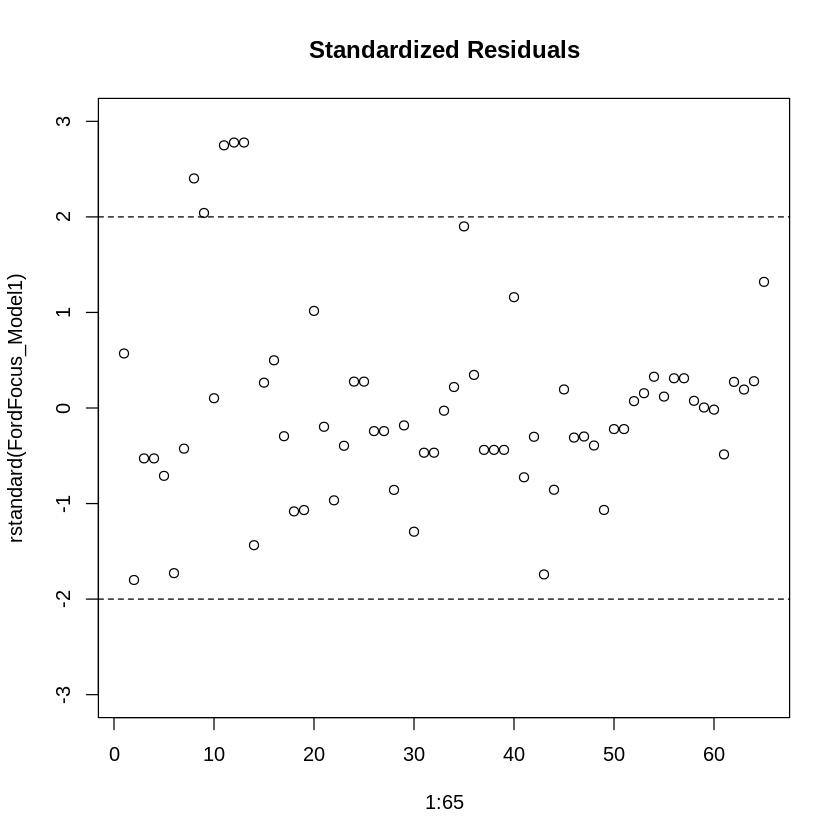

In [135]:
plot(1:65,rstandard(FordFocus_Model1), main="Standardized Residuals",ylim=c(-3,3))
abline(h=c(-2,2),lty=2)

### Standardized Residuals via Brute Force

In [151]:
FordFocus_StandardizedResiduals <- (FordFocus
                                      %>% select(Price, Miles)
                                      %>% mutate(Predicted_Price = predict(FordFocus_Model1, newdata=FordFocus))
                                      %>% mutate(Residual = (Price - Predicted_Price))
                                      %>% mutate(hii = hatvalues(FordFocus_Model1))
                                      %>% mutate(Standardized_Resids = Residual / sqrt(2440^2 * (1-hii)))
                                   )
#Next, show only the outliers
(FordFocus_StandardizedResiduals
      %>% mutate(rowid = 1:65)
      %>% filter(abs(Standardized_Resids) > 2)
)

Price,Miles,Predicted_Price,Residual,hii,Standardized_Resids,rowid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
19599,17696,13836.35,5762.652,0.03333964,2.402125,8
18697,18134,13800.60,4896.401,0.03301452,2.040691,9
20229,20232,13629.36,6599.638,0.03149840,2.748401,11
20299,20232,13629.36,6669.638,0.03149840,2.777552,12
20299,20232,13629.36,6669.638,0.03149840,2.777552,13


The following code can be used to identify the observations in the original data.frame that are outliers.

In [145]:
outliers <- which( abs( rstandard(FordFocus_Model1))  > 2)

In [150]:
( FordFocus
      %>% select(Price, Miles)
      %>% slice(outliers)
)

Price,Miles
<dbl>,<dbl>
19599,17696
18697,18134
20229,20232
20299,20232
20299,20232


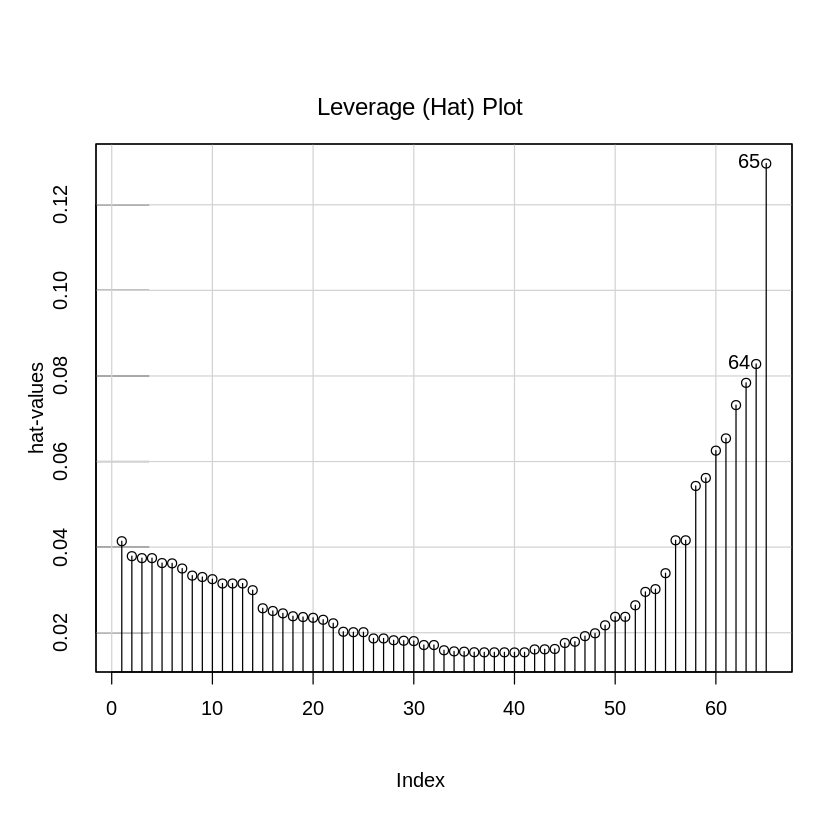

In [126]:
#influenceIndexPlot(FordFocus_Model1, vars=c("Cook", "Studentized", "Bonf", "hat"), id=TRUE, grid=TRUE, main="Diagnostic Plots")
influenceIndexPlot(FordFocus_Model1, vars=c("hat"), grid=TRUE, main="Leverage (Hat) Plot")


End of Document